# Exploración:

Verificación de que el .env funcione bien:

In [19]:
# - Importación de librerías:

import os
from dotenv import load_dotenv

# - Cargar variables de entorno:

load_dotenv()

# - Obtener credenciales desde .env:

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

Hacer la petición, ver que funcione, corregir sino:

In [20]:
# - Importación de librerías:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Autenticación usando las credenciales cargadas desde .env:

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

# - Extracción de Canciones Populares del Artista:

artist_id = "6XyY86QOPPrYVGvF9ch6wz"
results = spotify.artist_top_tracks(artist_id)

# - Procesamiento de Datos:

songs = []
for track in results['tracks']:
    songs.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })

Si funcionó, crear el DataFrame empleando a Pandas:

In [21]:
# - Importación de librerías:

import pandas as pd

# - Conversión a DataFrame:

tracks_df = pd.DataFrame(songs)
tracks_df

,name,popularity,duration_min
0,Numb,90,3.125333
1,In the End,89,3.614667
2,The Emptiness Machine,85,3.173783
3,Faint,86,2.701767
4,Up From the Bottom,85,3.053717
5,One Step Closer,85,2.622217
6,Heavy Is the Crown,82,2.783533
7,What I've Done,84,3.420433
8,Somewhere I Belong,75,3.565550
9,Crawling,82,3.482667


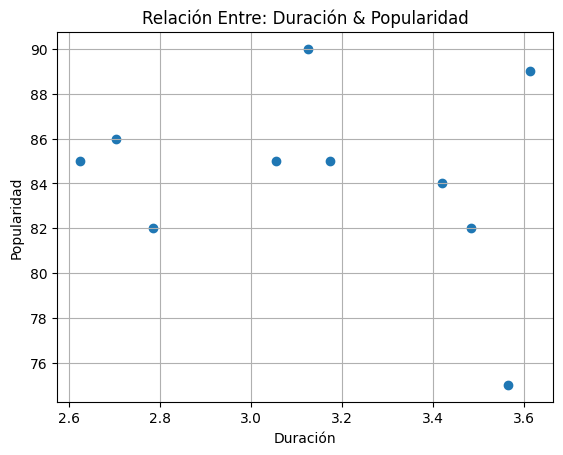

In [22]:
# - Importación de librerías:

import matplotlib.pyplot as plt

# - Parámetros de graficación:

plt.scatter(tracks_df['duration_min'], tracks_df['popularity'])
plt.xlabel("Duración")
plt.ylabel("Popularidad")
plt.title("Relación Entre: Duración & Popularidad")
plt.grid(True)

# - Visualización de gráfico:

plt.show()

No hay una patrón destacable como una resemblanza de línea, por consiguiente, se infiere que no hay correlación entre la popularidad de una canción y su duración.